In [2]:
## to do:
## for every paper:
## 1. take only from abstract -- can't apply: papers with no abstract, e.g. 176
## 2. break up into sections: abstract, introduction, methods, results, discussion, conclussion, references
        ## lines with less than 5 char
        ## new paragraph symbol: \x0c
## 3. remove new line symbols;
## 4. break up into sentences in each sentence
## 5. match mention lists
## 6. tokenize
## 6. tag other words

## output - columns: sentence number, words, POS, tag, case sequence
import pandas as pd
import numpy as np
import re
import nltk
from nltk import tokenize
import json
# nltk.download('averaged_perceptron_tagger')
import glob
import os
import sys
import string

In [3]:
# data_path = sys.argv[0]
# data_path = "../data/input/"
data_path = "../../train_test/"

In [4]:
# all_files = glob.glob('files/text/*.txt')
# all_files.sort()
# # all_files
with open(data_path+'/publications.json') as f:
    sample_dict = json.load(f)
filehandles = [str(i['publication_id']) for i in sample_dict]
# filehandles

In [ ]:
# labels_df.loc[labels_df['publication_id'] == int(handle)]['mention_list'] 

In [ ]:
# handle = '105'
# with open(data_path+'/files/text/'+handle+'.txt', 'r') as f:
#     txt_test_raw = f.read()
# print("Processing:", handle)
# txt_test_parsed = [i for i in txt_test_raw.split('\x0c')]
# txt_test_rm_paragraph = ''.join(txt_test_parsed)
# txt_test_connect_word = txt_test_rm_paragraph.replace('-\n', '')
# txt_test_connect_word
# # txt_test_parsed_filter = [i for i in txt_test_rm_paragraph.split('\n') if len(i)>3]
# # txt_test_parsed_concat = ' '.join(txt_test_parsed_filter)
# # txt_test_sentences = tokenize.sent_tokenize(txt_test_parsed_concat)
# # tokenizer = tokenize.RegexpTokenizer(r'\w+')
# # txt_tokenize = [tokenizer.tokenize(i) for i in txt_test_sentences]

In [ ]:
# sent_len = [len(i) for i in txt_tokenize]

In [ ]:
# print(np.mean(sent_len), np.std(sent_len), np.median(sent_len))

In [5]:
df_concat = pd.read_csv('../../train_test/df_concat.csv')
len(df_concat)

38671990

In [6]:
df_sentence_len = df_concat.groupby(['Sentence_ID']).agg(['count'])


In [26]:
sent_len = np.array(df_sentence_len.iloc[:,0])
len(sent_len)

1913592

In [20]:
sent_len_filter = sent_len[sent_len<200]

In [27]:
sent_len_clip = [i if i <= 200 else 200 for i in sent_len]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


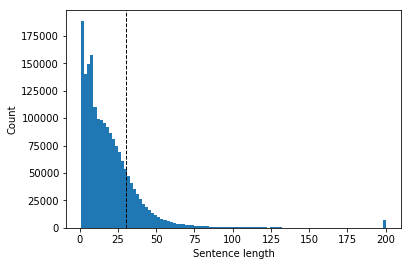

In [32]:
plt.hist(sent_len_clip, bins=100)
plt.axvline(x=30, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.xlabel('Sentence length')
plt.ylabel('Count')
plt.show()

In [ ]:
# handle = '170'

In [ ]:
# with open(data_path+'/files/text/'+handle+'.txt', 'r') as f:
#     txt_test_raw = f.read()
# print("Processing:", handle)
# txt_test_parsed = [i for i in txt_test_raw.split('\x0c')]
# txt_test_rm_paragraph = ''.join(txt_test_parsed)
# txt_test_connect_word = txt_test_rm_paragraph.replace('-\n', '- ')
# txt_test_parsed_filter = [i for i in txt_test_connect_word.split('\n') if len(i)>3]
# txt_test_parsed_concat = ' '.join(txt_test_parsed_filter)
# txt_test_sentences = tokenize.sent_tokenize(txt_test_parsed_concat)
# mention_lists = labels_df.loc[labels_df['publication_id'] == int(handle)]['mention_list'] 
# sentence_idx = {}
# for mention_list in mention_lists:
#     if mention_list == []:
#         continue
#     else:
#         for phrase in mention_list:
#             sentence_idx[phrase] = [txt_test_sentences.index(s) for s in txt_test_sentences if phrase in s]
# mention_sentences_id = list(set([x for y in sentence_idx.values() for x in y]))
# mention_sentences_id.sort()
# tokenizer = tokenize.RegexpTokenizer(r'\w+')
# txt_tokenize = [tokenizer.tokenize(i) for i in txt_test_sentences]


In [ ]:
# last_sentence = 0
# last_sentence_norm = 0
# for i in range(len(txt_tokenize)):
#     pos_raw = nltk.pos_tag(txt_tokenize[i])
#     pos = [i[1] for i in pos_raw]
#     words = txt_tokenize[i]
#     sent_count = int(np.ceil(len(words)/max_sent_len))
#     word_ul = []
#     for j in range(len(words)):
#         word_ul.append(''.join(['U' if x.isupper() else 'L' for x in words[j]]))
#     if i == 0:
#         text_df = pd.DataFrame({"Word_ID": range(len(txt_tokenize[i])), "Sentence_ID": i+last_sentence, 
#                                 "Word_ID_Norm": range(len(txt_tokenize[i])), "Sentence_ID_Norm": i+last_sentence_norm,
#                                 "Pub_id": handle, 
#                                 "Word": txt_tokenize[i], "POS": pos, "UL": word_ul})
#         if sent_count > 1:
#             for j in range(sent_count)[1:]:
#                 sent_len = np.min([max_sent_len, text_df.shape[0]-max_sent_len*j])
#                 text_df.iloc[j*max_sent_len+np.array(range(sent_len)), 2] = np.array(range(sent_len))
#                 text_df.iloc[j*max_sent_len+np.array(range(sent_len)), 3] += j
#             last_sentence_norm += j
# #                 print(text_df)
#         if i in mention_sentences_id:
#             text_df['Tag'] = 'M'
#         else:
#             text_df['Tag'] = 'O'

#     else:
#         text_df_add = pd.DataFrame({"Word_ID": range(len(txt_tokenize[i])), "Sentence_ID": i+last_sentence, 
#                                 "Word_ID_Norm": range(len(txt_tokenize[i])), "Sentence_ID_Norm": i+last_sentence_norm,
#                                 "Pub_id": handle, 
#                                 "Word": txt_tokenize[i], "POS": pos, "UL": word_ul})
#         if sent_count > 1:
#             for j in range(sent_count)[1:]:
#                 sent_len = np.min([max_sent_len, text_df_add.shape[0]-max_sent_len*j])
#                 text_df_add.iloc[j*max_sent_len+np.array(range(sent_len)), 2] = np.array(range(sent_len))
#                 text_df_add.iloc[j*max_sent_len+np.array(range(sent_len)), 3] += j
#             last_sentence_norm += j
# #                 print(text_df_add)
#         if i in mention_sentences_id:
#             text_df_add['Tag'] = 'M'
#         else:
#             text_df_add['Tag'] = 'O'
#         text_df = pd.concat([text_df,text_df_add], axis=0)


In [ ]:
# mention_phrases = list(sentence_idx.keys())
# for mention_phrase in mention_phrases:
#     print(mention_phrase)
#     mention_token = tokenizer.tokenize(mention_phrase)
#     print(sentence_idx[mention_phrase])
#     for sentence_id in sentence_idx[mention_phrase]:
#         print(sentence_id)
#         mentioned_sentence = list(text_df['Word'][text_df['Sentence_ID'] == sentence_id+last_sentence])
#         print(mentioned_sentence)
#         match_idx = []
#         for ref_token_idx in range(len(mention_token)):
#             for sentence_token_idx in range(len(mentioned_sentence)):
#                 if mentioned_sentence[sentence_token_idx] == mention_token[ref_token_idx]:
#                     match_idx.append(sentence_token_idx)
#         match_idx = list(set(match_idx))
#         match_idx.sort()
#         print(match_idx)
#         match_idx_final = []
#         for word_idx in match_idx:
#             if match_idx_final == []:
#                 match_idx_final.append(word_idx)
#             else:
#                 if word_idx == match_idx_final[-1]+1:
#                     match_idx_final.append(word_idx)
#                 elif len(match_idx_final) == len(mention_token):
#                     break
#                 else:
#                     match_idx_final = [word_idx]
#         print(match_idx_final)
#         tag = ["B"] + ["I"] * (len(match_idx_final)-1)
#         print(tag)
#         if len(match_idx_final)>1:
#             text_df.loc[(text_df['Sentence_ID'] == sentence_id+last_sentence) & 
#                         (text_df['Word_ID'] >= match_idx_final[0]) & 
#                         (text_df['Word_ID'] <= match_idx_final[-1]), 'Tag'] = tag
#             print(text_df.loc[text_df['Sentence_ID'] == sentence_id])

#         elif len(match_idx_final) == 1:
#             text_df.loc[(text_df['Sentence_ID'] == sentence_id+last_sentence) & 
#                         (text_df['Word_ID'] == match_idx_final[0]), 'Tag'] = tag   
#             print(text_df.loc[(text_df['Sentence_ID'] == sentence_id) & 
#                         (text_df['Word_ID'] == match_idx_final[0])])

In [ ]:
# text_df[text_df['Sentence_ID'] == 21]

In [ ]:
# with open(data_path+'/data_set_citations.json') as f:
with open('../rich-context-competition/evaluate/data_set_citations.json') as f:  
    labels_raw = json.load(f)
labels_df = pd.DataFrame(labels_raw)

data_tidy_dict = {}
last_sentence = 0
last_sentence_norm = 0
max_sent_len = 30
for handle in filehandles:
    with open(data_path+'/files/text/'+handle+'.txt', 'r') as f:
        txt_test_raw = f.read()
    print("Processing:", handle)
    txt_test_parsed = [i for i in txt_test_raw.split('\x0c')]
    txt_test_rm_paragraph = ''.join(txt_test_parsed)
    txt_test_connect_word = txt_test_rm_paragraph.replace('-\n', '- ')
    txt_test_parsed_filter = [i for i in txt_test_connect_word.split('\n') if len(i)>3]
    txt_test_parsed_concat = ' '.join(txt_test_parsed_filter)
    txt_test_sentences = tokenize.sent_tokenize(txt_test_parsed_concat)
    mention_lists = labels_df.loc[labels_df['publication_id'] == int(handle)]['mention_list'] 
    sentence_idx = {}
    for mention_list in mention_lists:
        if mention_list == []:
            continue
        else:
            for phrase in mention_list:
                sentence_idx[phrase] = [txt_test_sentences.index(s) for s in txt_test_sentences if phrase in s]
    mention_sentences_id = list(set([x for y in sentence_idx.values() for x in y]))
    mention_sentences_id.sort()
    tokenizer = tokenize.RegexpTokenizer(r'\w+')
    txt_tokenize = [tokenizer.tokenize(i) for i in txt_test_sentences]
    for i in range(len(txt_tokenize)):
        pos_raw = nltk.pos_tag(txt_tokenize[i])
        pos = [i[1] for i in pos_raw]
        words = txt_tokenize[i]
        sent_count = int(np.ceil(len(words)/max_sent_len))
        word_ul = []
        for j in range(len(words)):
            word_ul.append(''.join(['U' if x.isupper() else 'L' for x in words[j]]))
        if i == 0:
            text_df = pd.DataFrame({"Word_ID": range(len(txt_tokenize[i])), "Sentence_ID": i+last_sentence, 
                                    "Word_ID_Norm": range(len(txt_tokenize[i])), "Sentence_ID_Norm": i+last_sentence_norm,
                                    "Pub_id": handle, 
                                    "Word": txt_tokenize[i], "POS": pos, "UL": word_ul})
            if sent_count > 1:
                for j in range(sent_count)[1:]:
                    sent_len = np.min([max_sent_len, text_df.shape[0]-max_sent_len*j])
                    text_df.iloc[j*max_sent_len+np.array(range(sent_len)), 2] = np.array(range(sent_len))
                    text_df.iloc[j*max_sent_len+np.array(range(sent_len)), 3] += j
                last_sentence_norm += j
#                 print(text_df)
            if i in mention_sentences_id:
                text_df['Tag'] = 'M'
            else:
                text_df['Tag'] = 'O'
        
        else:
            text_df_add = pd.DataFrame({"Word_ID": range(len(txt_tokenize[i])), "Sentence_ID": i+last_sentence, 
                                    "Word_ID_Norm": range(len(txt_tokenize[i])), "Sentence_ID_Norm": i+last_sentence_norm,
                                    "Pub_id": handle, 
                                    "Word": txt_tokenize[i], "POS": pos, "UL": word_ul})
            if sent_count > 1:
                for j in range(sent_count)[1:]:
                    sent_len = np.min([max_sent_len, text_df_add.shape[0]-max_sent_len*j])
                    text_df_add.iloc[j*max_sent_len+np.array(range(sent_len)), 2] = np.array(range(sent_len))
                    text_df_add.iloc[j*max_sent_len+np.array(range(sent_len)), 3] += j
                last_sentence_norm += j
#                 print(text_df_add)
            if i in mention_sentences_id:
                text_df_add['Tag'] = 'M'
            else:
                text_df_add['Tag'] = 'O'
            text_df = pd.concat([text_df,text_df_add], axis=0)
    mention_phrases = list(sentence_idx.keys())
    for mention_phrase in mention_phrases:
        mention_token = tokenizer.tokenize(mention_phrase)
        for sentence_id in sentence_idx[mention_phrase]:
#             print(sentence_id)
            mentioned_sentence = list(text_df['Word'][text_df['Sentence_ID'] == sentence_id+last_sentence])
#             print(mentioned_sentence)
            match_idx = []
            for ref_token_idx in range(len(mention_token)):
                for sentence_token_idx in range(len(mentioned_sentence)):
                    if mentioned_sentence[sentence_token_idx] == mention_token[ref_token_idx]:
                        match_idx.append(sentence_token_idx)
            match_idx = list(set(match_idx))
            match_idx.sort()
#             print(match_idx)
            match_idx_final = []
            for word_idx in match_idx:
                if match_idx_final == []:
                    match_idx_final.append(word_idx)
                else:
                    if word_idx == match_idx_final[-1]+1:
                        match_idx_final.append(word_idx)
                    elif len(match_idx_final) == len(mention_token):
                        break
                    else:
                        match_idx_final = [word_idx]
#             print(match_idx_final)
            tag = ["B"] + ["I"] * (len(match_idx_final)-1)
#             print(tag)
            if len(match_idx_final)>1:
    #             print(text_df.loc[text_df['Sentence_ID'] == sentence_id])
                text_df.loc[(text_df['Sentence_ID'] == sentence_id+last_sentence) & 
                            (text_df['Word_ID'] >= match_idx_final[0]) & 
                            (text_df['Word_ID'] <= match_idx_final[-1]), 'Tag'] = tag
            elif len(match_idx_final) == 1:
    #             print(text_df.loc[(text_df['Sentence_ID'] == sentence_id) & 
    #                         (text_df['Word_ID'] == match_idx_final[0])])
                text_df.loc[(text_df['Sentence_ID'] == sentence_id+last_sentence) & 
                            (text_df['Word_ID'] == match_idx_final[0]), 'Tag'] = tag     
    last_sentence = text_df.iloc[-1]['Sentence_ID']+1
    last_sentence_norm = text_df.iloc[-1]['Sentence_ID_Norm']+1
    data_tidy_dict[handle] = text_df

In [ ]:
# for key, val in data_tidy_dict.items():
#     val.to_csv("files/processed/{}.csv".format(str(key)))

In [ ]:
# data_tidy_dict

In [ ]:
# temp = data_tidy_dict['1033']

In [ ]:
# temp[temp['Sentence_ID'] == 463]

In [ ]:
  
df_concat = pd.concat(data_tidy_dict.values(), ignore_index=True)

#change noised 'M' to 'O'
stop_words = set(nltk.corpus.stopwords.words('english')) #179 words
st = set(string.printable)
df_concat["Word"] = df_concat["Word"].apply(lambda x: '' if set(str(x)) != set(str(x)).intersection(st) else x)
df_m = df_concat.loc[df_concat['Tag']=='M'] 
df_m = df_m.loc[~df_m['Word'].isin(stop_words)] #remove stopwords
df_m = df_m.loc[~df_m['Word'].str.contains('\d', regex=True,na=False)] #remove numberish strings, remain Nan still as nan
df_m_sort = df_m.groupby(['Word']).size().nlargest(200).reset_index(name='top200')
#drop single characters
droplist=[]
for i in range(df_m_sort.shape[0]):
    word = df_m_sort.iloc[i]['Word']
    if word.lower() in stop_words or len(word)==1:       
        droplist.append(i)
df_m_sort.drop(droplist,inplace=True)
top100_indicaters = df_m_sort['Word'].values.tolist()[:100]
print(top100_indicaters)





In [ ]:
df_concat.loc[(df_concat['Tag']=='M') & (~df_concat['Word'].isin(top100_indicaters)),'Tag']='O'

In [ ]:
# print(df_concat.loc[(df_concat['Word'] == 'NHANES') & (df_concat['Pub_id'] == '170')])

In [ ]:
df_concat.head

In [ ]:
# df_concat.loc[df_concat['Sentence_ID'].isin([2335])]

In [ ]:
# df_concat.to_csv(data_path+'/df_concat.csv')
df_concat.to_csv(data_path+'/df_concat_test.csv')